In [1]:
import pickle
import utils
import models
import planners
import constants as c
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
env, robot = utils.setup()

In [3]:
cf = models.CostFunction(robot, num_dofs=7, normalize=True, linear=True)
#custom_cost = {'NN': planners.get_trajopt_error_cost(cf)}
custom_cost = {
    'NN': planners.get_trajopt_cost(cf)
}

(TensorShape([Dimension(None), Dimension(10)]), TensorShape([Dimension(None)]))


In [4]:
with open('./data/experiments/allan_sad_1.pkl') as f:
    data = pickle.load(f)

In [5]:
loss = utils.train(cf, data['tq'])

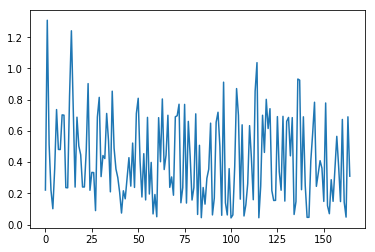

In [6]:
plt.plot(loss)

In [7]:
robot.SetActiveDOFValues(c.configs[0])

In [10]:
with env:
    wps = planners.trajopt_simple_plan(
        env, robot, c.configs[1],
        custom_costs=custom_cost).GetTraj()

In [8]:
with env:
    wps = planners.trajopt_simple_plan(
        env, robot, c.configs[1],
        custom_traj_costs=custom_cost,
        joint_vel_coeff=10).GetTraj()

In [9]:
traj = utils.waypoints_to_traj(env, robot, wps, 1, None)
robot.ExecuteTrajectory(traj)

NameError: name 'wps' is not defined